In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [3]:
ticker = 'AAPL'

Data = yf.download(ticker, start='2015-01-01', end='2023-09-01')

Data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498680,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808514,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810753,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144636,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072325,237458000
...,...,...,...,...,...,...
2023-08-25,177.380005,179.149994,175.820007,178.610001,178.610001,51449600
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900


In [4]:
Data.reset_index(inplace=True)

Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498680,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808514,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810753,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144636,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072325,237458000
...,...,...,...,...,...,...,...
2176,2023-08-25,177.380005,179.149994,175.820007,178.610001,178.610001,51449600
2177,2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2178,2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900
2179,2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900


In [6]:
Close = Data['Close']
print(Close.shape)

(2181,)


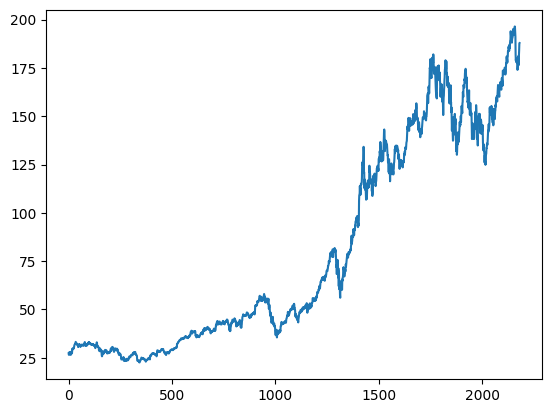

In [7]:
import matplotlib.pyplot as plt

plt.plot(Close)

In [8]:
# LSTM Models are sensitive to the scale of the data, apply MinMix scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

Close = scaler.fit_transform(np.array(Close).reshape(-1,1))
Close.shape

(2181, 1)

In [9]:
Close

array([[0.02730568],
       [0.02287695],
       [0.02289133],
       ...,
       [0.9290829 ],
       [0.949386  ],
       [0.95065136]])

In [10]:
train_size = int(len(Close)*0.65)
test_size = len(Close) - train_size

Train_Data, Test_Data = Close[:train_size, :], Close[train_size:len(Close), :1]

In [11]:
train_size, test_size

(1417, 764)

In [12]:
Train_Data

array([[0.02730568],
       [0.02287695],
       [0.02289133],
       ...,
       [0.53100108],
       [0.52927559],
       [0.53476837]])

In [13]:
Test_Data

array([[0.53560233],
       [0.55036956],
       [0.5854255 ],
       [0.59398096],
       [0.58804244],
       [0.59780578],
       [0.58910652],
       [0.58794182],
       [0.61228537],
       [0.64184853],
       [0.62585912],
       [0.56535243],
       [0.56581256],
       [0.51899463],
       [0.54487678],
       [0.52284819],
       [0.51427833],
       [0.53360367],
       [0.53463896],
       [0.51502602],
       [0.50473067],
       [0.48460011],
       [0.50323529],
       [0.51318552],
       [0.48621059],
       [0.49253733],
       [0.51588877],
       [0.53130303],
       [0.52629913],
       [0.53619187],
       [0.54182845],
       [0.52014493],
       [0.54016048],
       [0.5209502 ],
       [0.53199324],
       [0.53136056],
       [0.54286374],
       [0.58559804],
       [0.56661778],
       [0.56713545],
       [0.56437467],
       [0.55465447],
       [0.53716967],
       [0.5459696 ],
       [0.54228858],
       [0.53584679],
       [0.53176317],
       [0.531

In [14]:
# In timeseries data, the next value in the data depends on all the previous values of the data and we make our X and Y values for the model accordingly
def CreateDataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        batch = dataset[i:(i+time_step), 0]
        dataX.append(batch)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)


In [15]:
time_step = 100
TrainX, TrainY = CreateDataset(Train_Data, time_step)
TestX, TestY = CreateDataset(Test_Data, time_step)

In [16]:
print(TrainX)

[[0.02730568 0.02287695 0.02289133 ... 0.06067926 0.0564806  0.05996031]
 [0.02287695 0.02289133 0.0250338  ... 0.0564806  0.05996031 0.05958647]
 [0.02289133 0.0250338  0.03098669 ... 0.05996031 0.05958647 0.05742962]
 ...
 [0.19272136 0.22508845 0.2231329  ... 0.51846262 0.49918041 0.52008745]
 [0.22508845 0.2231329  0.24171053 ... 0.49918041 0.52008745 0.53159063]
 [0.2231329  0.24171053 0.22632504 ... 0.52008745 0.53159063 0.53100108]]


In [19]:
print(TestX.shape, TestY.shape)
print(TrainX.shape, TrainY.shape)

(663, 100) (663,)
(1316, 100) (1316,)


In [20]:

# We need to reshape the dataset as required by the LSTM model
TrainX = TrainX.reshape(TrainX.shape[0], TrainX.shape[1], 1)
TestX = TestX.reshape(TestX.shape[0], TestX.shape[1], 1)

In [22]:
# Create a LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [23]:
# This is a stacked LSTM Model
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(TrainX, TrainY, validation_data=(TestX, TestY), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
21/21 [==============================] - 7s 183ms/step - loss: 0.0047 - val_loss: 0.0541
Epoch 2/100
21/21 [==============================] - 3s 151ms/step - loss: 4.3169e-04 - val_loss: 0.0019
Epoch 3/100
21/21 [==============================] - 3s 153ms/step - loss: 2.8550e-04 - val_loss: 0.0065
Epoch 4/100
21/21 [==============================] - 3s 153ms/step - loss: 2.5021e-04 - val_loss: 0.0066
Epoch 5/100
21/21 [==============================] - 3s 156ms/step - loss: 2.2883e-04 - val_loss: 0.0056
Epoch 6/100
21/21 [==============================] - 3s 155ms/step - loss: 2.1884e-04 - val_loss: 0.0073
Epoch 7/100
21/21 [==============================] - 3s 162ms/step - loss: 2.1285e-04 - val_loss: 0.0081
Epoch 8/100
21/21 [==============================] - 3s 155ms/step - loss: 2.1255e-04 - val_loss: 0.0038
Epoch 9/100
21/21 [==============================] - 3s 156ms/step - loss: 1.8856e-04 - val_loss: 0.0100
Epoch 10/100
21/21 [==============================] - 3s 15

In [26]:
import tensorflow as tf

tf.__version__

'2.13.0'

In [27]:
## Checking the performance metrics of our model
TrainPredict = model.predict(TrainX)
TestPredict = model.predict(TestX)

21/21 [==============================] - 0s 20ms/step


In [28]:
TrainPredict = scaler.inverse_transform(TrainPredict)
TestPredict = scaler.inverse_transform(TestPredict)

In [29]:
import math
from sklearn.metrics import mean_squared_error

# Finding the Root Mean Square Error of the Model
math.sqrt(mean_squared_error(TrainY, TrainPredict))

47.180249616917386

In [30]:
## Test data RMSE
math.sqrt(mean_squared_error(TestY, TestPredict))

155.44821402732217

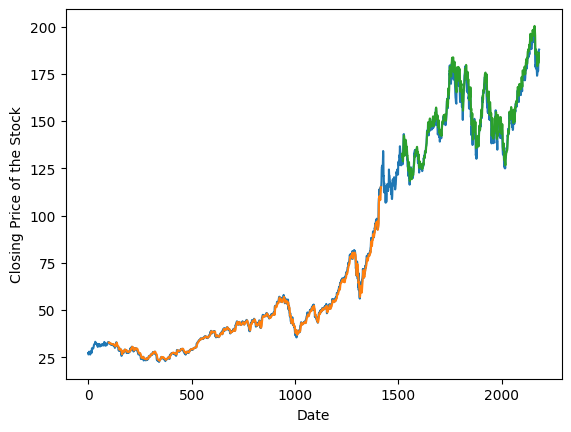

In [35]:
## Plotting the relevant graphs
lookback = 100

# Making the train predictions plot
TrainPredPlot = np.empty_like(Close)
TrainPredPlot[:,:] = np.nan
TrainPredPlot[lookback : len(TrainPredict)+lookback, :] = TrainPredict

# Making the test predictions plot
TestPredPlot = np.empty_like(Close)
TestPredPlot[:, :] = np.nan
TestPredPlot[len(TrainPredict)+(2*lookback)+1 : len(Close)-1, :] = TestPredict

# Plotting baseline and predictions
plt.plot(scaler.inverse_transform(Close))
plt.plot(TrainPredPlot)
plt.plot(TestPredPlot)
plt.xlabel('Date')
plt.ylabel('Closing Price of the Stock')
plt.show()

In [43]:
## Now we attempt to predict the data for the next 30 days

PredictX = Test_Data[-100:].reshape(1,-1)
PredictX.shape

(1, 100)

In [44]:
from numpy import array

NewPredictX = list(PredictX)
NewPredictX = PredictX[0].tolist()

In [47]:
PredictY = []
n_step = 100
i = 0

while(i<30):
    if(len(NewPredictX)>100):
        InputX = np.array(NewPredictX[1:])
        print(f"{i} day input {InputX}")
        InputX = InputX.reshape((1, n_step, 1))
        YPred = model.predict(InputX, verbose= 0)
        print(f"{i} day output {YPred}")
        NewPredictX.extend(YPred[0].tolist())
        NewPredictX = NewPredictX[1:]
        PredictY.extend(YPred.tolist())
        i += 1
    else:
        PredictX = PredictX.reshape((1, n_step, 1))
        PredY = model.predict(PredictX, verbose=0)
        print(PredY)
        NewPredictX.extend(PredY[0].tolist())
        print(len(PredictX))
        PredictY.extend(PredY.tolist())
        i += 1

print(PredictY)
        

[[0.96085334]]
1
1 day input [0.79092979 0.82233342 0.82032042 0.82043539 0.82756739 0.83423925
 0.82860263 0.8192276  0.82101058 0.81203812 0.81198054 0.83872548
 0.84602994 0.84551232 0.83947313 0.83320392 0.82365626 0.8684037
 0.86800105 0.85805083 0.86834613 0.86943895 0.86265212 0.85977632
 0.85977632 0.86334228 0.87691603 0.87754871 0.87202715 0.85684295
 0.85845339 0.86506777 0.87910158 0.88985711 0.88956951 0.905904
 0.91085037 0.90297072 0.90084266 0.89284796 0.90866483 0.91090794
 0.92718486 0.92442412 0.92810514 0.9399534  0.93368419 0.93420181
 0.92816271 0.9456475  0.94380695 0.93569728 0.95174417 0.95858858
 0.9605441  0.98573608 0.97705122 0.97055189 0.97331263 0.96681331
 0.95490756 0.95185923 0.96157943 0.96600809 0.96687088 0.98585114
 0.98435567 0.99223541 0.98090477 0.97406037 0.97871914 0.98372299
 0.98878442 0.98142239 0.99643404 1.         0.99516869 0.97774138
 0.96963162 0.91683207 0.89877209 0.90423608 0.89497602 0.89371066
 0.89267533 0.90228056 0.89071981 0.

In [48]:
NewDay = np.arange(1,101)
PredDay = np.arange(101, 131)

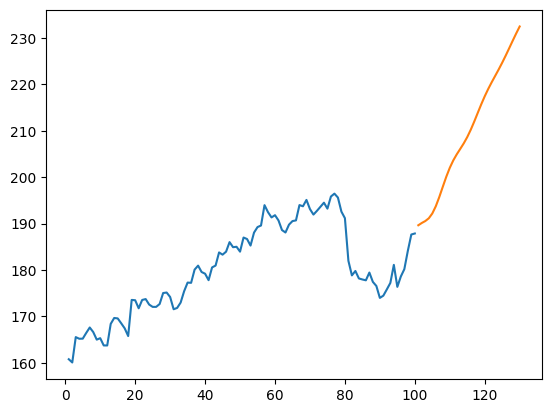

In [49]:
plt.plot(NewDay, scaler.inverse_transform(Close[-100:]))
plt.plot(PredDay, scaler.inverse_transform(PredictY))

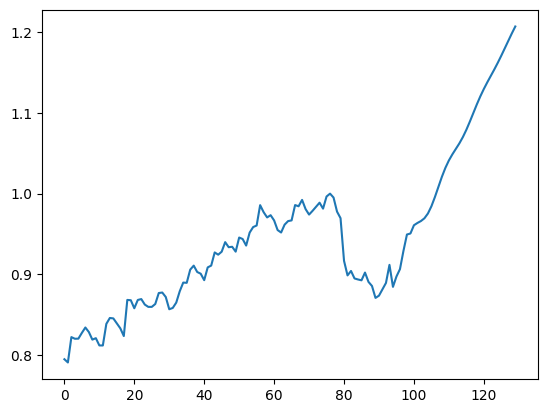

In [50]:
NewClose = Close.tolist()
NewClose.extend(PredictY)
plt.plot(NewClose[-130:])

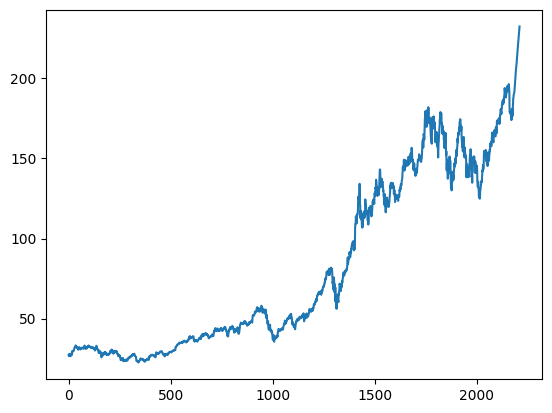

In [51]:
NewClose = scaler.inverse_transform(NewClose)
plt.plot(NewClose)